<a href="https://colab.research.google.com/github/RIANAEH/DataScience/blob/main/012_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

확률과 확률분포
===============

확률분포
--------
주요 분포:

|              |                            |
|--------------|----------------------------|
| 이항분포     | `_binom(_, size, prob)`    |
| 다항분포     | `_multinom(_, size, prob)` |
| 포아송분포   | `_pois(_, lambda)`         |
| 균일분포     | `_unif(_, min, max)`       |
| 정규분포     | `_norm(_, mean, sd)`       |
| $t$-분포     | `_t(_, df)`                |
| 카이제곱분포 | `_chisq(_, df)`            |
| $F$ 분포     | `_f(_, df1, df2)`          |

함수의 종류:

|        |               |         |                 |
|--------|---------------|---------|-----------------|
| `d___` | (density)     | pdf/pmf | $f(x)$          |
| `p___` | (probability) | cdf     | $p = F(x)$      |
| `q___` | (quantile)    |         | $x = F^{-1}(p)$ |
| `r___` | (random)      |         |                 |

### 이항분포

#### (1)

앞면과 뒷면이 나올 확률이 동일한 공정한 동전을 10번 던졌을 때 앞면이 3번
나올 확률은?

In [ ]:
dbinom(3, size=10, prob=0.5)

[1] 0.1171875

#### (1)

공정한 동전을 10번 던졌을 때 앞면의 수를 $X$라고 하자. $X$는 이항분포를
따른다. $X$의 확률질량함수를 그래프로 그려라.

- 이항분포의 확률질량함수는 히스토그램과 비슷한 형태로 그려야한다!!
- 선의 길이가 확률을 의미한다. 

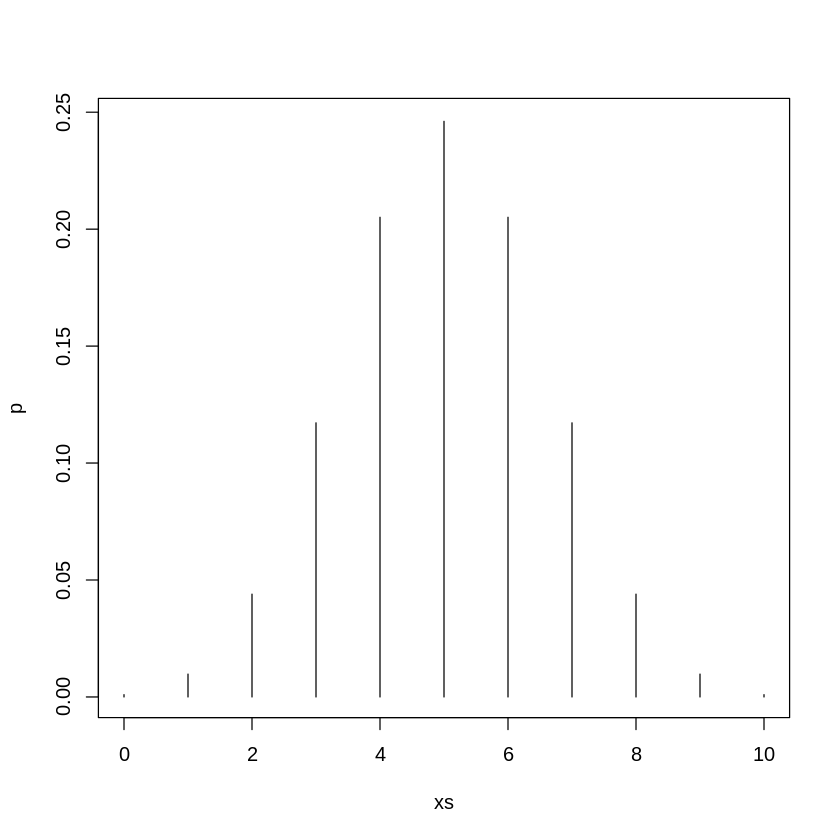

In [1]:
xs <- 0:10
p <- dbinom(xs, size=10, prob=0.5)
plot(xs, p, type="h")

#### (2)

공정한 동전을 10번 던졌을 때 앞면이 8번 이상 나올 확률은?

- 8번 이상 나올 확률

In [ ]:
sum(dbinom(8:10, size=10, prob=0.5))

[1] 0.0546875

In [ ]:
1 - pbinom(7, size=10, prob=0.5)

[1] 0.0546875

- 3-8번 나올 확률

In [ ]:
pbinom(8, size=10, prob=0.5) - pbinom(2, size=10, prob=0.5)

[1] 0.9345703

In [ ]:
diff(pbinom(c(2,8), size=10, prob=0.5))

[1] 0.9345703

#### (3)

공정한 동전을 10번 던졌을 때 앞면의 수를 $X$라고 하자. $X$의
누적분포함수를 그래프로 그려라.

- 누적분포함수는 계단형 그래프!!

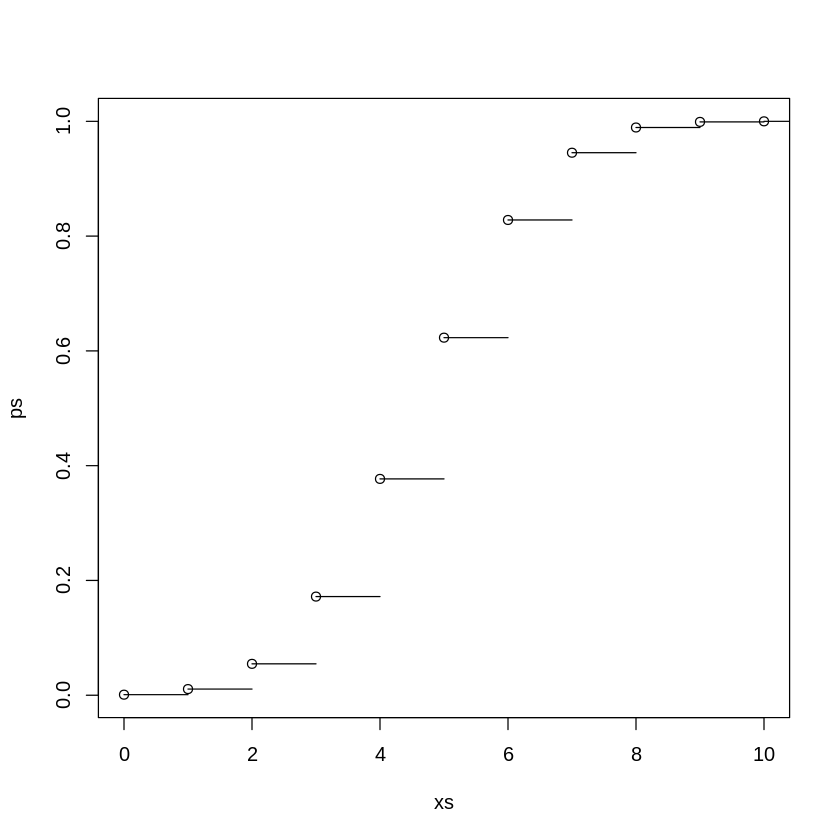

In [ ]:
xs <- 0:10
ps <- pbinom(xs, size = 10, prob = 0.5)
plot(xs, ps)
segments(xs, ps, xs + 1, ps)

#### (4)

공정한 동전을 10번 던졌을 때 앞면의 수를 세는 실험을 반복한 결과 $X_1,
\cdots, X_n$을 생각해 보자. 이러한 난수를 $n=1000$개 생성하는 실험을
하여라. 결과의 절대돗수와 상대돗수를 계산하고 결과를 그래프로 그려
보아라. 이 그래프에 이론적인 확률의 그래프를 추가하여 비교하여 보아라.

- 20번 동전을 던졌을 때 각각의 앞면의 개수

In [ ]:
rbinom(20, size = 10, prob = 0.5)

[1] 5 5 6 9 6 2 4 3 6 4 3 5 6 6 7 3 8 5 4 3

- 1000번 던졌을 때

In [2]:
x <- rbinom(1000, size = 10, prob = 0.5)

- 절대도수 & 상대도수

In [17]:
table(x) # 절대도수

table(x) / sum(table(x)) # 상대도수 = 비율

x
  1   2   3   4   5   6   7   8   9  10 
 11  47 119 204 245 208 103  48  13   2 

x
    1     2     3     4     5     6     7     8     9    10 
0.011 0.047 0.119 0.204 0.245 0.208 0.103 0.048 0.013 0.002 

- 그래프

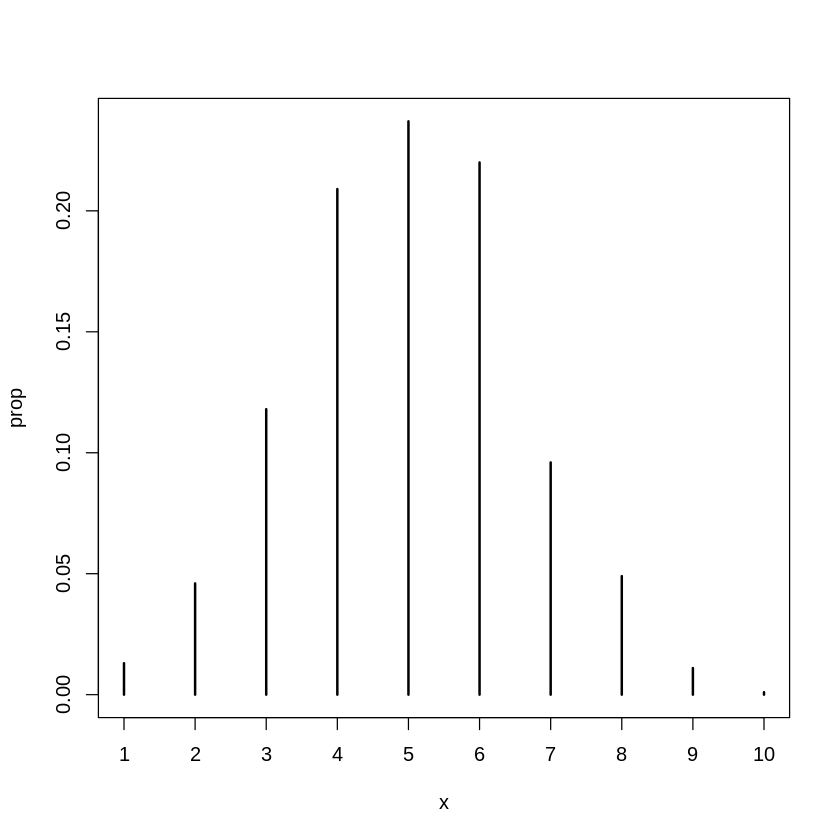

In [ ]:
prop <- prop.table(table(x))
plot(prop)

- 그래프에 x값이 factor로 그려지기 때문에 값이 없을 경우 그래프 모양에 문제가 생길 수 있다. 
- numeric으로 변환해서 그려준다. 

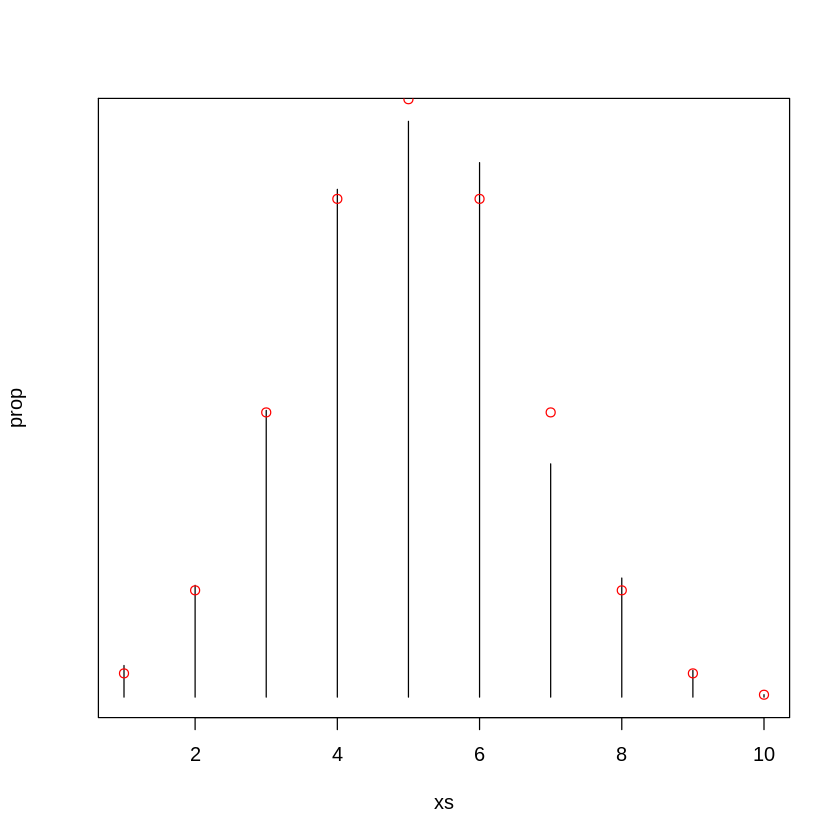

In [ ]:
prop <- prop.table(table(x))
xs <- as.numeric(names(prop))
plot(xs, prop, type="h")
points(xs, dbinom(xs, size=10, prob=0.5), col="red") # 이론적인 값

- 10000번 던졌을 때

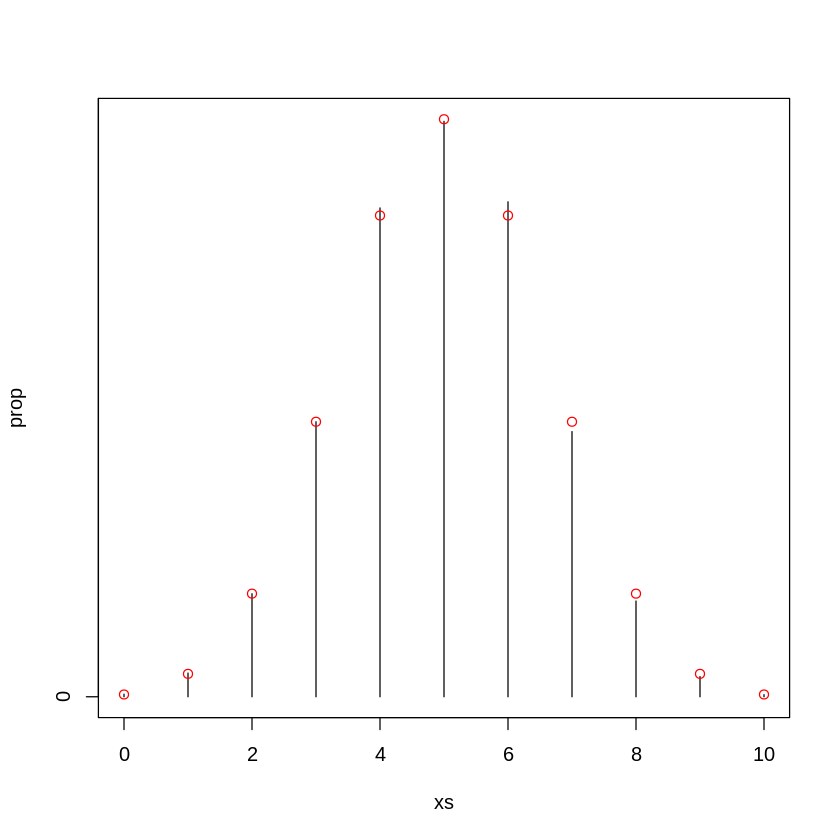

In [ ]:
x <- rbinom(10000, size = 10, prob = 0.5)
prop <- prop.table(table(x))
xs <- as.numeric(names(prop))
plot(xs, prop, type="h")
points(xs, dbinom(xs, size=10, prob=0.5), col="red") # 이론적인 값

#### (5)

공정한 동전을 10번 던졌을 때 앞면의 수를 세는 실험을 반복한 결과 $X_1,
\cdots, X_n$을 생각해 보자. 이러한 난수를 $n=1000$개 생성하는 실험을
하여라. 이 결과의 경험적 누적 분포 함수(empirical cdf)를 그려보아라.
`ecdf()` 함수를 이용하여라.

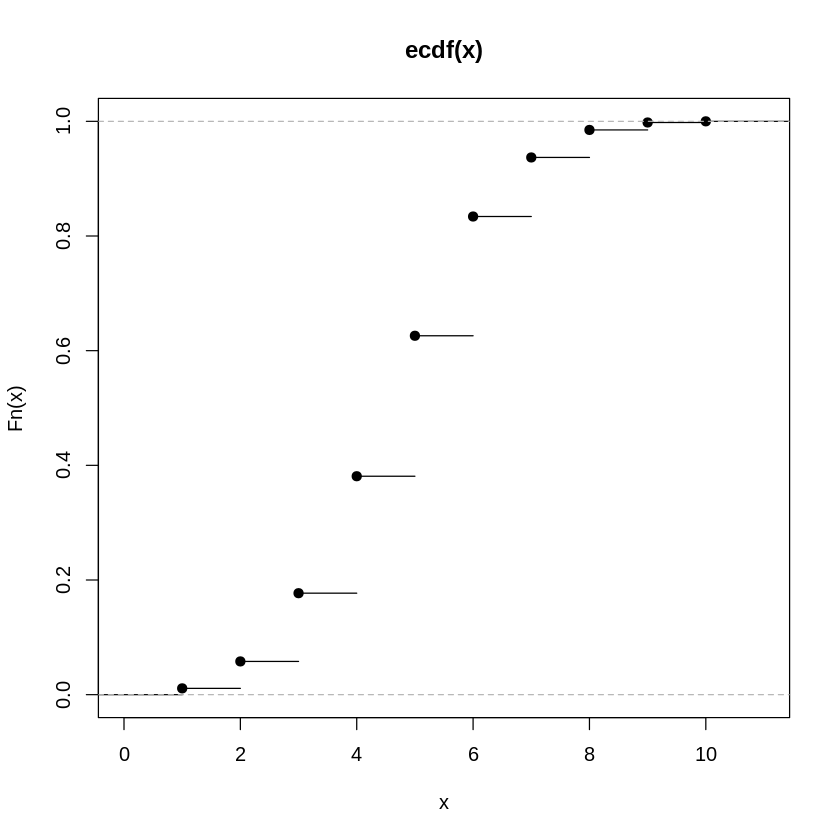

In [5]:
x <- rbinom(1000, size = 10, prob = 0.5)
plot(ecdf(x))

#### (6)

예, 아니오로 답을 고르는 문제 10개로 구성된 시험을 보았다. 몇 개 이상
맞추어야 제대로 알고 푼 것이라고 할 수 있는가? 유의수준 5%에서 무작위로
답을 선택했다는 귀무가설이 기각되려면 몇 개 이상 맞추어야 하는가?

### 포아송분포
- 참고 : <https://rstatall.tistory.com/4>

#### (1)

어느 콜센터에 10분에 평균 7건의 전화가 온다. 10분 당 걸려오는 전화의
수가 포아송분포를 따른다고 하자. 10분 동안 10건 이상의 전화가 걸려올
확률은?

In [16]:
1 - sum(dpois(x = 0:9, lambda = 7))

[1] 0.1695041

In [19]:
1- ppois(q = 9, lambda = 7)

[1] 0.1695041

#### (2)

평균 10인 포아송 분포의 확률질량함수 그래프를 그려라.

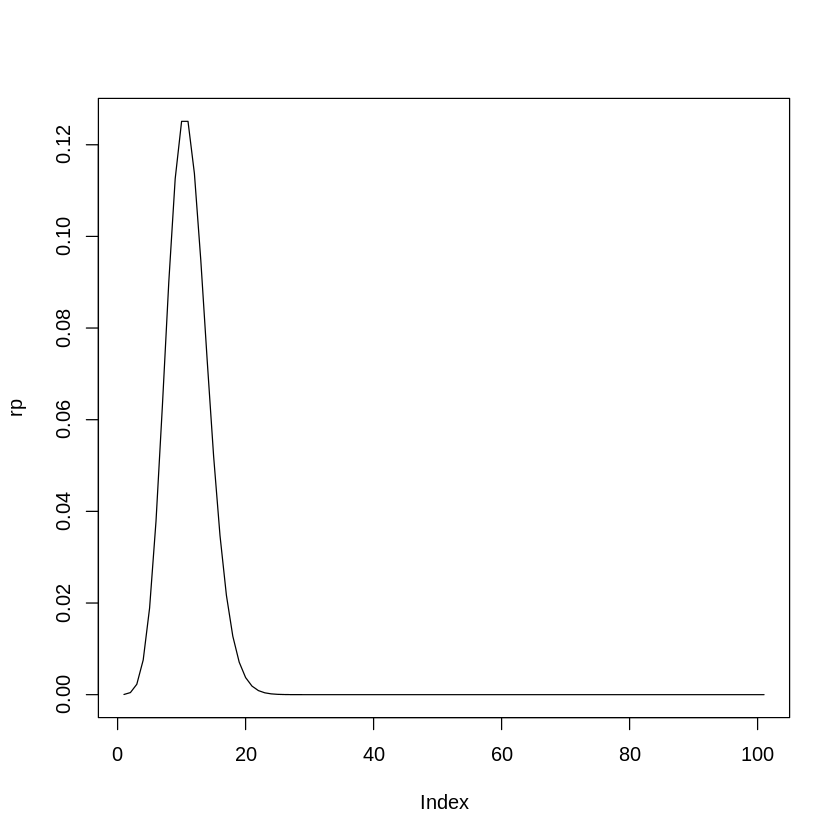

In [13]:
rp <- dpois(x = 0:100, lambda = 10)
plot(rp, type = "l")

### 정규분포
- 참고 : <https://statools.tistory.com/9>

#### (1)

2017년 기준 서울 20대 초반 남성의 키는 평균 174.4cm이고 표준편차는
5.7cm로 알려져있다. 정규분포를 따른다고 가정하자.

-   임의의 한 사람의 키가 170cm 이하일 확률은?
-   서울에 20대 초반 남성은 약 180만명이다. 이 중 키가 200cm 이상인
    사람의 수는 몇명이나 될까?
-   상위 10%에 속하는 경우의 키는?

참고:

-   서울연구원 <https://www.si.re.kr/node/61499>
-   KOSIS 연령 및 성별 인구
    <https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1IN1603>
-   KOSIS 신장 변화: 성인 남자
    <https://kosis.kr/statHtml/statHtml.do?orgId=113&tblId=DT_113_STBL_1020274>
-   KOSIS 신장 변화: 성인 여자
    <https://kosis.kr/statHtml/statHtml.do?orgId=113&tblId=DT_113_STBL_1020275>

-   임의의 한 사람의 키가 170cm 이하일 확률은?

In [20]:
pnorm(170, mean = 174.4, sd = 5.7)

[1] 0.220078

- 서울에 20대 초반 남성은 약 180만명이다. 이 중 키가 200cm 이상인 사람의 수는 몇명이나 될까?

In [22]:
p <- 1 - pnorm(200, mean = 174.4, sd = 5.7)
p

[1] 3.540684e-06

In [23]:
p <- pnorm(200, mean = 174.4, sd = 5.7, lower.tail=FALSE)
p

[1] 3.540684e-06

In [24]:
1800000 * p

[1] 6.37323

- 상위 10%에 속하는 경우의 키는?

In [25]:
qnorm(0.1, mean = 174.4, sd = 5.7)

[1] 167.0952

#### (2)

2017년 기준 서울 20대 초반 여성의 키는 평균 161.2cm이고 표준편차는
5.9cm이다. 정규분포를 따른다고 가정하자.

-   남성과 여성의 키의 확률밀도함수를 그려서 비교하여라.
-   상위 1%에 속하는 여성보다 작은 남성의 비율은?
-   여성은 158만명, 남성은 180만명이다. 10만번째로 키가 큰 여성보다 작은
    남성의 수는?

- 남성과 여성의 키의 확률밀도함수를 그려서 비교하여라.
- 정규분포의 경우 -4, +4 사이에서 보통 커버가된다. 
- 남성의 표준편차가 더 커서 위로 올라가 있는 모습을 볼 수 있다. 

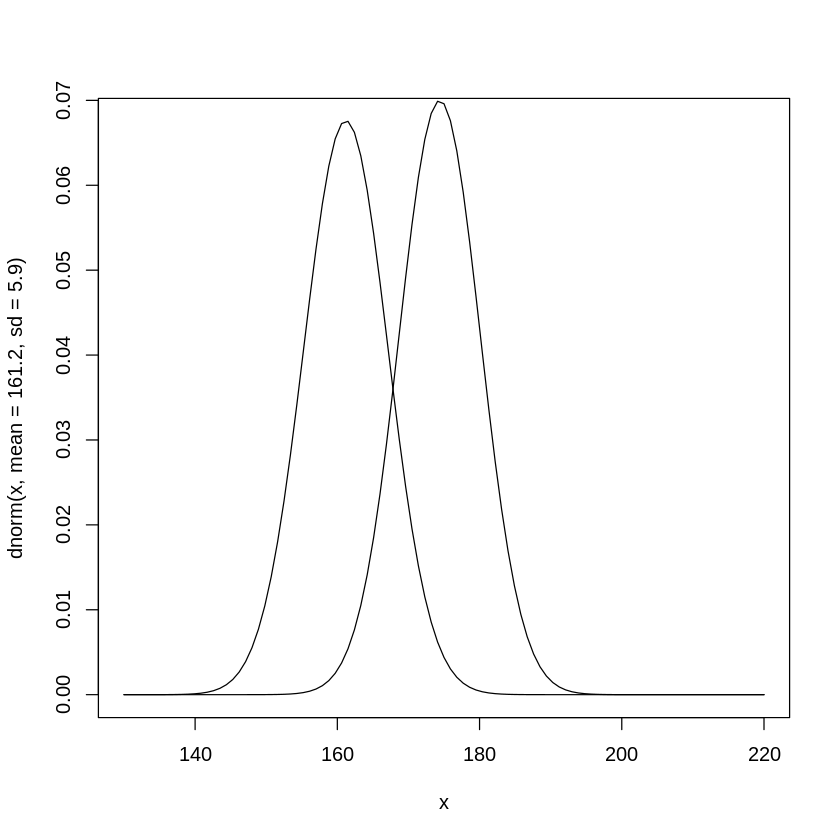

In [ ]:
curve(dnorm(x, mean = 161.2, sd = 5.9), xlim = c(130, 220))
curve(dnorm(x, mean = 174.4, sd = 5.7), add = TRUE)

- 상위 1%에 속하는 여성보다 작은 남성의 비율은?

In [27]:
q <- qnorm(0.01, mean = 161.2, sd = 5.9, lower.tail=FALSE)
q

[1] 174.9255

In [28]:
pnorm(q, mean = 174.4, sd = 5.7)

[1] 0.5367243

- 여성은 158만명, 남성은 180만명이다. 10만번째로 키가 큰 여성보다 작은 남성의 수는?

In [30]:
q <- qnorm(10/158, mean = 161.2, sd = 5.9)
q

[1] 152.1865

In [32]:
1800000 * pnorm(q, mean = 174.4, sd = 5.7)

[1] 87.61165

#### (3)

여성 $n$명을 임의로 뽑아 키를 측정하는 조사를 생각해보자. 여성의 키의
분포 $N(161.2, 5.9^2)$에서 $n$개의 난수를 생성하면 된다. $n$을 100,
1000, 10000 등으로 바꾸어 다음 그래프를 그려보아라.

-   히스토그램을 그리고 이론적인 정규분포를 겹쳐서 그려라.
-   경험적 누적 분포 함수를 그리고 이론적인 정규분포를 겹쳐서 그려라.

- 히스토그램을 그리고 이론적인 정규분포를 겹쳐서 그려라.
- 100

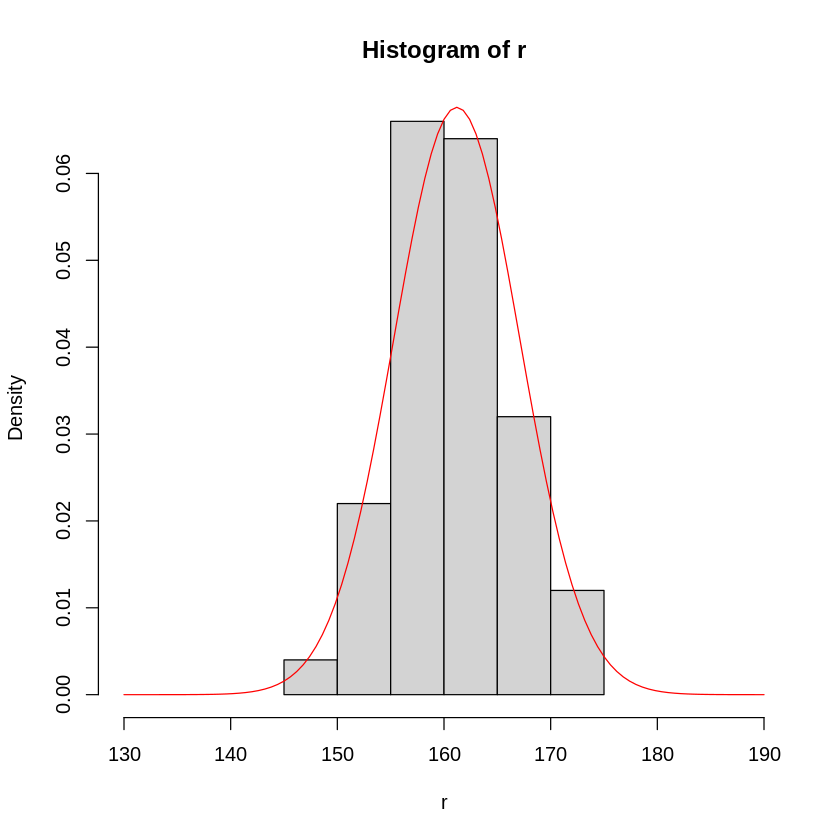

In [62]:
r <- rnorm(n = 100, mean = 161.2, sd = 5.9)
hist(r, xlim = c(130, 190), prob = TRUE)

curve(dnorm(x, mean = 161.2, sd = 5.9), col = "red", add = TRUE)

- 1000

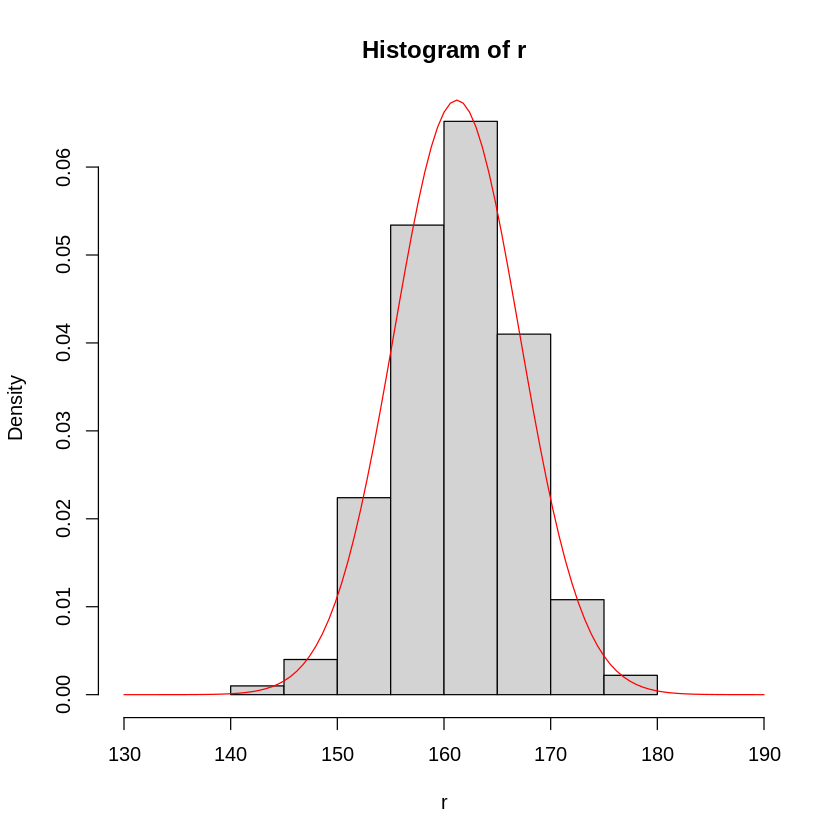

In [64]:
r <- rnorm(n = 1000, mean = 161.2, sd = 5.9)
hist(r, xlim = c(130, 190), prob = TRUE)

curve(dnorm(x, mean = 161.2, sd = 5.9), col = "red", add = TRUE)

- 10000

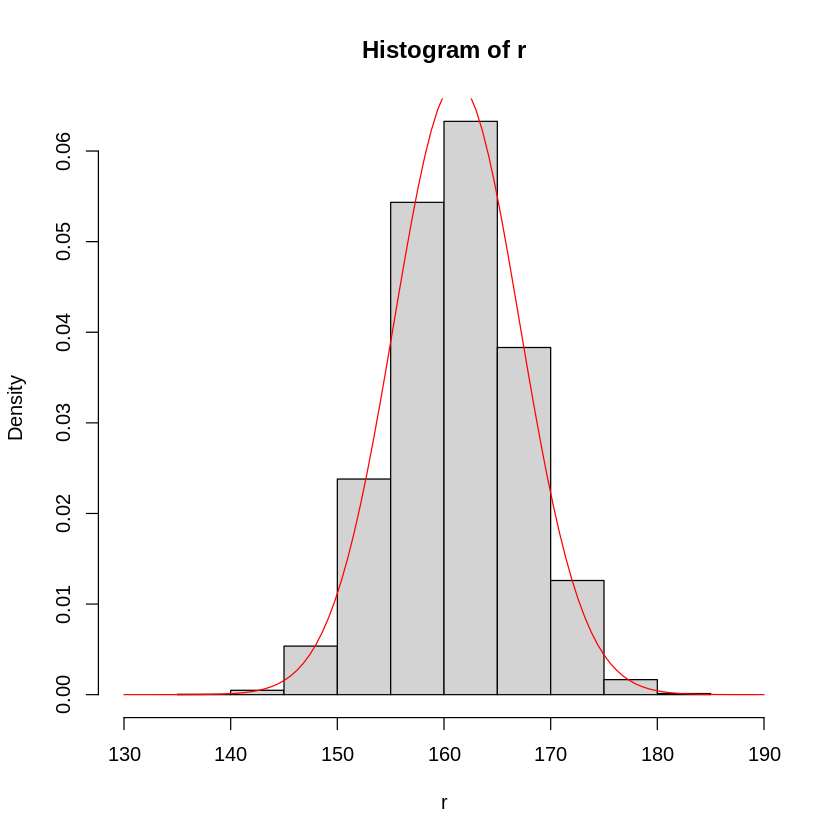

In [70]:
r <- rnorm(n = 10000, mean = 161.2, sd = 5.9)
hist(r, xlim = c(130, 190), prob = TRUE)

curve(dnorm(x, mean = 161.2, sd = 5.9), col = "red", add = TRUE)

- 경험적 누적 분포 함수를 그리고 이론적인 정규분포를 겹쳐서 그려라.



#### (4)

남성의 키는 정규분포 $N(174.4, 5.7^2)$, 여성의 키는 정규분포 $N(161.2,
5.9^2)$을 따른다고 하자. 임의의 남성 한 명과 임의의 여성 한 명을 짝을
지을 때 여성이 키가 더 클 확률을 구하여라.

-   정규분포의 성질을 이용하여 이론적인 값을 구하여라.
-   시뮬레이션을 이용해 계산하여 보아라.

### $t$-분포

- 참고 : <https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=jungj5011&logNo=220627344869>

#### (1)

Cushny와 Peebles는 1904년 hyoscyamine hydrobromide의 광학 이성질체의
수면 효과의 차이를 10명의 환자들 대상으로 실험 결과를 Journal of
Physiology에 발표하였다. L-이성질체가 D-이성질체의 수면 효과의 차이를
관찰하였다. 차이가 정규분포를 따른다고 가정하자. 10명 대상 실험 결과
표본평균 1.58시간, 표본표준편차 1.23시간이었다. 수면 효과의 차이의 95%
신뢰구간을 구하여라.

In [76]:
n <- 20
m <- 1.58
s <- 1.23

- 정규분포의 신뢰구간

In [83]:
error <- qnorm(p = 0.975, mean = m, sd = s)
upper <- m + error
round(upper, 3)
lower <- m - error
round(lower, 3)

[1] 5.571

[1] -2.411

- t-분포의 신뢰구간

In [84]:
error <- qt(0.975, n - 1) * s / sqrt(n)
upper <- m + error
round(upper, 3)
lower <- m - error
round(lower, 3)

[1] 2.156

[1] 1.004

#### (2)

실제 데이터는 다음과 같다. 차이 $L - D$의 95% 신뢰구간을 구하여라.
차이가 없다는 귀무가설을 검정하여라.

In [ ]:
sleep <- read.table(header = TRUE, textConnection("
patient   D       L
1         0.7     1.9   
2        -1.6     0.8
3        -0.2     1.1
4        -1.2     0.1
5        -0.1    -0.1
6         3.4     4.4
7         3.7     5.5
8         0.8     1.6
9         0       4.6
10        2.0     3.4
"))


In [86]:
str(sleep)

'data.frame':	20 obs. of  3 variables:
 $ extra: num  0.7 -1.6 -0.2 -1.2 -0.1 3.4 3.7 0.8 0 2 ...
 $ group: Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ ID   : Factor w/ 10 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...


#### (3)

표준정규분포와 $t$-분포의 밀도함수를 겹쳐서 그려서 비교하여라. 자유도에
따라 $t$-분포가 어떻게 달라지는지 보여라.

### 카이제곱분포

#### (1)

카이제곱분포의 확률밀도함수 그래프를 그려보아라. 자유도에 따라 어떻게
다른지 보여라.

#### (2)

서로 독립이고 표준정규분포를 따르는 확률변수 $Z_1,\cdots,Z_n$이 있을 때
제곱의 합을 생각해 보자.

$$
X = \sum_{i=1}^n Z_i^2
$$

이러한 확률변수 $X$의 분포가 자유도가 $n$인 카이제곱분포이다.
시뮬레이션을 통해 이것을 보여라.

-   표준정규분포를 따르는 난수 $n=8$를 생성하고 제곱의 합을 구한다.
-   제곱의 합을 구하는 실험을 1000번 반복한다.
-   결과의 히스토그램을 그린다.
-   자유도가 8인 카이제곱분포의 확률밀도함수를 겹쳐 그려서 비교한다.

#### (3)

멘델의 유전 법칙의 예상에 따르면 어떤 콩의 2세대의 주름 여부와 색깔에
따른 비율이 9 : 3 : 3 : 1이라고 한다. 다음은 100개의 표본을 관찰한
결과이다. 적합도 검정을 하여라.

| 유형 | 주름 없는 노랑 | 주름 없는 초록 | 주름 있는 노랑 | 주름 있는 초록 |
|------|----------------|----------------|----------------|----------------|
| 이론 | 9              | 3              | 3              | 1              |
| 관측 | 51             | 18             | 21             | 10             |

### $F$ 분포

#### (1)

자유도에 따라 $F$ 분포가 어떻게 달라지는지 그래프를 그려 보여라.

#### (2)

서로 독립인 카이제곱분포를 따르면 확률변수의 비의 형태가 $F$ 분포가
된다. 자유도가 각각 $k_1$, $k_2$인 카이제곱분포를 따르는 확률변수 $V_1$,
$V_2$가 있을 때 다음과 같은 비가 자유도가 $k_1, k_2$이$F$ 분포가 된다.

$$
F = \frac{V_1/k_1}{V2/k_2}
$$

시뮬레이션을 통해 확연하여라.

-   자유도가 $k_1=30$인 카이제곱분포에서 $V_1$, 자유도가 $k_2=5$인
    카이제곱분포에서 $V_2$ 난수를 생성한다.
-   $F = \frac{V_1/k_1}{V_2/k_2}$를 계산한다.
-   이것을 1000번 반복하여 얻어진 결과의 히스토그램을 그린다.
-   이론적인 $F$ 분포의 확률밀도함수를 겹쳐 그려서 비교한다.

모집단과 표본
-------------

### 상대빈도와 확률

통계적 확률(statistical probability)라는 확률을 상대빈도의 극한으로 보는
것을 말한다. 표본의 크기가 커짐에 따라 상대빈도가 확률에 가까와지는 것을
모의실험을 통해 확인해 보자.

-   어느 공장에서 생산되는 제품의 불량률이 1%라고 하자.
-   불량품이면 1, 정상이면 0이라고 하자.
-   이항분포를 이용하여 $n$개의 난수를 생성하고 1의 상대도수, 즉, 평균을
    계산하자. 이것이 표본불량률이다.
-   표본의 크기 $n$을 늘려가며 상대도수가 어떻게 변하는지 실험하고
    그래프로 표현하여라.

### 중심극한정리

중심극한정리(Central Limit Theorem)은 표본의 크기가 충분히 크면 모집단의
분포에 관계없이 표본평균의 분포가 정규분포에 가까와진다는 것이다.
모의실험을 통해 확인해 보자.

-   주사위 1개를 던져서 나오는 눈의 수 $X$의 분포를 그래프로 그려보아라.
-   주사위 1개를 던지는 실험을 1000번 반복한 결과의 돗수를 계산하고
    그래프로 그려보아라.
-   주사위 2개를 던져서 나오는 눈의 합에 대해 같은 실험을 해 보아라.
-   주사위 1개를 던져서 나오는 눈의 합에 대해 같은 실험을 해 보아라.

### 표준오차

다음과 같은 모의실험을 해보자.

-   대통령 선거에서 A, B 두 후보가 출마하였다. A 후보의 지지율이
    45%($p=0.45$)라고 하자. 실제 상황에서는 우리는 이것을 모르기 때문에
    여론 조사를 한다. 모의실험에서는 참값을 알고 실험을 할 수 있다.
-   랜덤하게 $n=100, 500, 1000, 5000, 10000, 50000$에게 물어보았을 때 A
    후보를 지지하는 표본비율의 표준편차를 생각해 보자. 중심극한정리에
    따라 표본비율은 평균이 $p$이고 분산이 $p(1-p)/n$인 정규분포로 근사할
    수 있다.
-   이것을 모의실험을 통해 확인해 보아라.

### 신뢰구간

신뢰구간의 의미를 보여주는 모의실험을 해보자.

-   평균이 $\mu$이고 분산이 $\sigma^2$인 정규분포에서 난수를 생성하여
    크기 $n$인 표본을 얻는다.
-   표본평균 $\bar X$과 표본분산 $S^2$를 계산한다.
-   95% 신뢰구간을 계산한다.
-   이렇게 신뢰구간을 계산하는 실험을 $r$번 반복한다.
-   $r$번의 실험 중 신뢰구간이 $\mu$를 포함하지 않는 경우가 몇 번인지
    확인한다.

참고: <http://estat.me/estat/eStatU/64SampleEng.htm>